In [1]:
import load_files as lf
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import seaborn as sns
import measurement_analysis as ma
import pickle
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
file_path = "/Users/blazejmanczak/Desktop/Q1/DataChallenge3/"
flow_data_DRU, level_data_DRU = lf.get_measurements(file_path + "waterschap-aa-en-maas_sewage_2019/sewer_data/data_pump/RG8150")
rain_data = lf.get_rain(file_path +"/waterschap-aa-en-maas_sewage_2019/sewer_data/rain_timeseries")
data = lf.sdf(file_path + "waterschap-aa-en-maas_sewage_2019/sewer_model/aa-en-maas_sewer_shp")

In [3]:
# Either run this cell or open pickle in the next one
df = ma.measurement_analysis(flow_data_DRU, level_data_DRU, rain_data, area_data=data.area_data,
                             village_code="DRU", dry_threshold = 0)

In [3]:
def summarize_rain_data(rain_data, area_data=None, village_code=None, dry_threshold=2.5):
    """
    Function to reshape rain data to be fit for the DWAAS analysis.

    ~~~~~ INPUT  ~~~~~
    rain_data:     File as gathered by load_files.get_rain(...)
    area_data:     File as gathered by load_files.sdf(...).area_data
    village_code:  Identifier of the pump (e.g. 'DRU' for Drunen)
    dry_threshold: Minimum average rain per hour in the area that counts as wet
                   (2.5 recommended)

    ~~~~~ OUTPUT ~~~~~
    A data frame with the columns
    Date :     Date of measurement
    Total:     Average rainfall measurement in the area (unweighted by area size)
    DrySeries: Number of days since last rainfall.
    """

    # Convert to datetime if necessary
    if rain_data["Start"].dtype != "<M8[ns]":
            rain_data["Start"] = pd.to_datetime(rain_data["Start"])

    # Sort data by time because of it being possibly unordered
    rain_data.sort_values("Start", inplace=True)
    rain_data.reset_index(drop=True, inplace=True)

    # Selects only data from certain right village_code
    if village_code is not None:
        area_data["village_ID"] = area_data["sewer_system"].str.slice(4,7)
        area_data = area_data.loc[area_data["village_ID"] == village_code]
        areas = area_data["area_name"][area_data["area_name"].apply(lambda i: i in rain_data.columns)].to_list()

        rain_data = rain_data.loc[:, ["Start", "End"] + areas]

    # Create date column and sum up rain measurements over all area
    rain_data["Date"] = rain_data["Start"].apply(lambda i: i.date())
    rain_data["Total"] = rain_data.iloc[:, 2:].mean(axis=1)

    # Sum measurements by date and create dry-series column
    #rain_data = rain_data.groupby("Date")["Total"].sum().reset_index(drop=False)
    #rain_data["DrySeries"] = reset_cumsum(rain_data["Total"], dry_threshold)

    return rain_data


In [4]:
"""
#Save pickle
filename = 'ma_df_all'
outfile = open(filename,'wb')
pickle.dump(df,outfile)
outfile.close()
"""

# open pickle
pickle_in = open("/Users/blazejmanczak/Desktop/Q1/DataChallenge3/ma_df_all", "rb")
df = pickle.load(pickle_in)


In [5]:
level_data_DRU, flow_data_DRU = df.level_data, df.flow_data

In [6]:
rain_data_DRU = summarize_rain_data(rain_data, area_data= df.area_data, village_code="DRU", dry_threshold=2.5)[['Start', 'End', 'Total']]

In [13]:
#rain_data_DRU.to_csv("rainDru.csv")
#level_data_DRU.to_csv("levelDru.csv")
#flow_data_DRU.to_csv("flowDru.csv")
# df.flow_data.to_csv('flowDru.csv'
#rain_data_DRU.shape

In [8]:
dates = []
dates = dates + list(level_data_DRU['TimeStamp'])+ list(flow_data_DRU['TimeStamp']) + list(rain_data_DRU['Start']) + list(rain_data_DRU['End'])
dates = list(set(dates))

all_dates = pd.DataFrame(dates, columns = ['AllTimeStamps'])#all_dates.to_csv('all_dates.csv')  create a csv with all the dates
all_dates = pd.DataFrame(dates, columns = ['AllTimeStamps'])
all_dates.to_csv('all_dates.csv')

In [45]:
all_dates.shape

(3528480, 1)

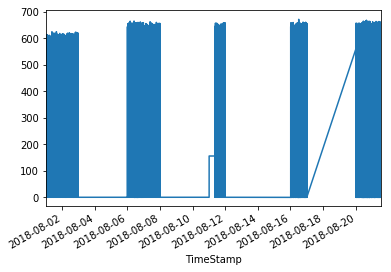

In [17]:
df.flow_data[(df.flow_data['Month'] == 8)]['Value'].iloc[:40000].plot() #& (df.flow_data['Day'] == 13)]

In [7]:
level_data_DRU.head()

,RG_ID,TimeStamp,Value,DataQuality,Date,Hour,Month,Weekend,TimeSpan,Freq,Delta,max,min,Dry
0,8150,2018-01-01 00:03:10,0.736894,1,2018-01-01,0,1,0,NaN,NaN,NaN,0,0,1
1,8150,2018-01-01 00:46:35,0.685767,1,2018-01-01,0,1,0,2605.0,0.000384,-0.051127,0,0,1
2,8150,2018-01-01 01:28:40,0.634640,1,2018-01-01,1,1,0,2525.0,0.000396,-0.051127,0,0,1
3,8150,2018-01-01 02:12:55,0.583514,1,2018-01-01,2,1,0,2655.0,0.000377,-0.051126,0,0,1
4,8150,2018-01-01 02:48:40,0.530739,1,2018-01-01,2,1,0,2145.0,0.000466,-0.052775,0,0,1


In [62]:
level_data_DRU[(level_data_DRU['TimeStamp'] > '2018-04-01 00:00:00') & (level_data_DRU['TimeStamp'] < '2018-06-01 00:00:00')]
    

,RG_ID,TimeStamp,Value,DataQuality,Date,Hour,Month,Weekend,TimeSpan,Freq,Delta,max,min,Dry
105735,8150,2018-04-01 00:00:20,-0.485225,1,2018-04-01,0,4,1,48821.0,0.000020,-0.485225,0,1,1
105736,8150,2018-04-01 00:01:15,-0.434082,1,2018-04-01,0,4,1,55.0,0.018182,0.051143,0,0,1
105737,8150,2018-04-01 00:02:10,-0.379672,1,2018-04-01,0,4,1,55.0,0.018182,0.054409,0,0,1
105738,8150,2018-04-01 00:03:05,-0.326896,1,2018-04-01,0,4,1,55.0,0.018182,0.052776,0,0,1
105739,8150,2018-04-01 00:04:00,-0.274433,1,2018-04-01,0,4,1,55.0,0.018182,0.052463,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196588,8150,2018-05-31 23:56:40,-0.970109,1,2018-05-31,23,5,0,20.0,0.050000,0.059522,0,0,1
196589,8150,2018-05-31 23:57:10,-0.915685,1,2018-05-31,23,5,0,30.0,0.033333,0.054424,0,0,1
196590,8150,2018-05-31 23:57:50,-0.859922,1,2018-05-31,23,5,0,40.0,0.025000,0.055763,0,0,1
196591,8150,2018-05-31 23:58:35,-0.805167,1,2018-05-31,23,5,0,45.0,0.022222,0.054756,0,0,1


In [14]:
def take_subset(start_date, end_date, rain = rain_data_DRU, level = level_data_DRU, flow = flow_data_DRU):
    rain = rain.copy()
    level = level.copy()
    flow = flow.copy()
    
    rain = rain[(rain['Start'] > start_date) & (rain['Start'] < end_date)]
    level = level[(level['TimeStamp'] > start_date) & (level['TimeStamp'] < end_date)]
    flow = flow[(flow['TimeStamp'] > start_date) & (flow['TimeStamp'] < end_date)]
    
    return rain, level, flow 
 
rain, level, flow = take_subset('2018-05-22 08:00:00','2018-05-25 00:00:00')

In [16]:
flow

,RG_ID,TimeStamp,Value,DataQuality,Date,Hour,Month,Weekend,TimeSpan,Freq,Flow,max,min,Dry
578710,8150,2018-05-22 08:01:25,0.347247,1,2018-05-22,8,5,0,1475.0,0.000678,0.142275,0,0,1
578711,8150,2018-05-22 08:01:30,0.034721,1,2018-05-22,8,5,0,5.0,0.200000,0.000048,0,1,1
578712,8150,2018-05-22 08:01:35,0.347213,1,2018-05-22,8,5,0,5.0,0.200000,0.000482,0,0,1
578713,8150,2018-05-22 08:17:55,0.347213,1,2018-05-22,8,5,0,980.0,0.001020,0.094519,0,0,1
578714,8150,2018-05-22 08:18:00,0.034721,1,2018-05-22,8,5,0,5.0,0.200000,0.000048,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604071,8150,2018-05-24 23:56:31,0.034721,1,2018-05-24,23,5,0,15.0,0.066667,0.000145,0,1,1
604072,8150,2018-05-24 23:56:36,0.347213,1,2018-05-24,23,5,0,5.0,0.200000,0.000482,0,0,1
604073,8150,2018-05-24 23:57:26,0.347213,1,2018-05-24,23,5,0,50.0,0.020000,0.004822,0,0,1
604074,8150,2018-05-24 23:57:31,0.034721,1,2018-05-24,23,5,0,5.0,0.200000,0.000048,0,1,1


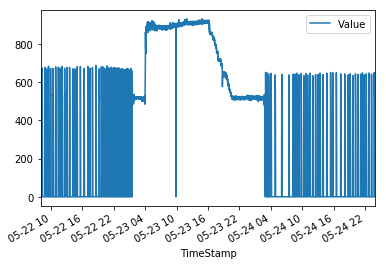

In [15]:
flow.plot(x = 'TimeStamp', y = 'Value')

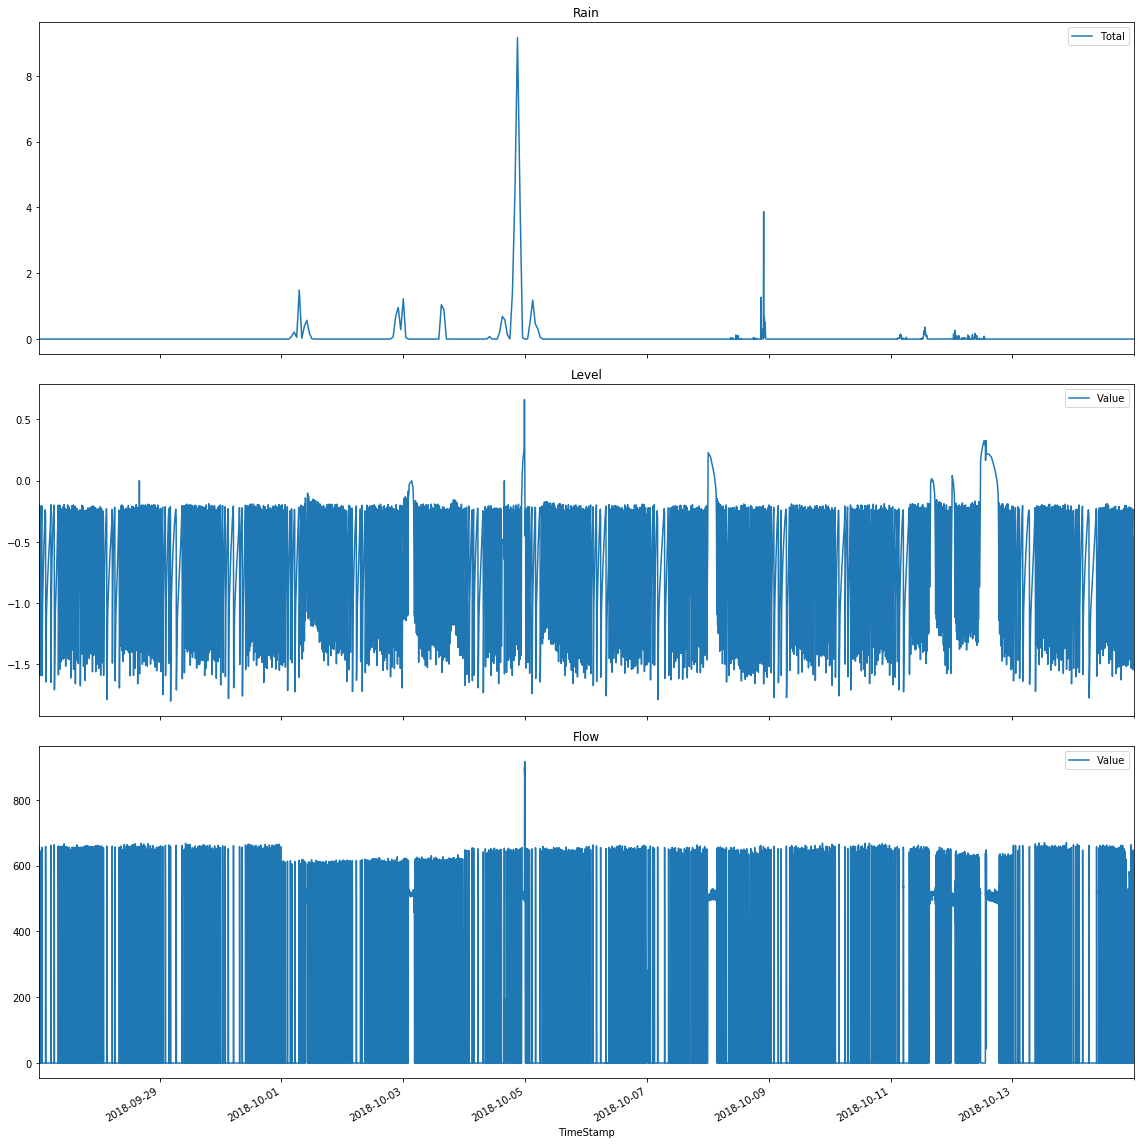

In [83]:
fig, ax = plt.subplots(nrows = 3, ncols=1, sharex = True, figsize = (16,16))

ax[0] = rain.plot(x = 'Start', y = 'Total', figsize = (16,16), ax = ax[0])
ax[1] = level.plot(x = 'TimeStamp', y = 'Value', ax = ax[1])
ax[2] = flow.plot(x = 'TimeStamp', y = 'Value', ax = ax[2])

ax[0].set_title("Rain")
ax[1].set_title("Level")
ax[2].set_title("Flow")
plt.tight_layout()

In [8]:
rain_data = df.rain_data.copy()
rain_data.set_index('Date', inplace = True)

In [9]:
leve

,Total,DrySeries
Date,,
2017-12-31,0.000000,0
2018-01-01,9.104127,0
2018-01-02,4.228682,0
2018-01-03,0.000000,1
2018-01-04,1.026882,2
...,...,...
2019-12-03,3.528955,0
2019-12-04,0.000000,1
2019-12-05,0.000000,2
